<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#standardize-names-as-triplets" data-toc-modified-id="standardize-names-as-triplets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>standardize names as triplets</a></span></li><li><span><a href="#visualize" data-toc-modified-id="visualize-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>visualize</a></span></li></ul></div>

In [423]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime

from tqdm import tqdm_notebook
import re
from function_library import *
from function_library2 import *

# standardize names as triplets

In [310]:
re_behalf = re.compile(r'(.*)[Oo]n [Bb]ehalf')
re_bracket = re.compile(r'([A-Za-z\-\_\.\@\,\s]+)\s?[\[\<\(]mailto\:([A-Za-z0-9\-\_\@\.\s]*?)[\]\>\)]')
re_bracket2 = re.compile(r'(.*)\s?[\[\<\(](.*)[\]\>\)]')
re_quotation = re.compile(r'[\'\"](.*)[\'\"]')

# old
# re_name1 = re.compile(r'.*?([A-Za-z]+\s?)[A-Za-z]?\.?\s([A-Za-z]+)')
# re_name2 = re.compile(r'.*?([A-Za-z]+),\s([A-Za-z]+)\s?[A-Z]?\.?')
# re_email = re.compile(r'.*?([A-Za-z_]*\.?\w+@[A-Za-z0-9_]*\.?[A-Za-z_]*\.?[A-Za-z]{2,3})')

re_name1 = re.compile(r'^([A-Za-z\-\']+)\s?[A-Za-z]?\.?\s([A-Za-z\-\']+)$')
re_name2 = re.compile(r'^([A-Za-z\-\']+),\s([A-Za-z\-\']+)\s?[A-Za-z]?\.?$')
re_name2_fullmidname = re.compile(r'^([A-Za-z\-\']+),\s([A-Za-z\-\']+)\s[A-Za-z\-\']+$')

re_email = re.compile(r'^([A-Za-z\_\-]*\.?[A-Za-z\_\-]*\.?\w+@[A-Za-z0-9\_\-]*\.?[A-Za-z_]*\.?[A-Za-z_]*\.?[A-Za-z]{2,3})$')


In [321]:
test_name = 'leslie h. smith'
test_name1 = 'jones, kristine p.'
test_name2 = 'edward  kring'
test_name3 = 'marvingoldstein@comcast.net<mailto:marvingoldstein@comcast.net> [mailto:marvingoldstein@comcast.net]'
test_name4 = 'marvingoldstein@comcast.net<mailto:marvingoldstein@comcast.net>'
test_name5 = 'bellamy, mike (fire dept)'
test_name6 = '"scott maddox" <scott.maddox@talgov.com<mailto:scott.maddox@talgov.com>> '
test_name7 = 'darryl jones [mailto:bethelitedj@gmail.com]<mailto:[mailto:bethelitedj@gmail.com]>'
test_name8 = 'hunt, ann marie'
test_name9 = 'wfmgovernmentaccountsupport@verizonwireless.com<mailto:wfmgovernmentaccountsupport@v erizonwireless.com> [mailto:wfmgovernmentaccountsupport@verizonwireless.com]<mailto:'
test_name10 = 'chelseaspins@gmail.com'
test_name11 = '@doh.state.fl.us'
test_name12 = 'Heiter, Deborah [mailto:Deborah.Heiter@talgov.com]'
test_name13 = 'Wiebler, Brian T.'
test_name14 = 'Kristine.P.Jones@dep.state.fl.us'
test_name15 = 'Christy'

In [323]:
# re_name2.findall(test_name13)
re_name2.findall(test_name15)

# re_bracket.findall(test_name12)
# re_bracket.findall(test_name9)
# re_name2_fullmidname.findall(test_name13)
# re_email.findall(test_name14)

[]

In [143]:
# either the sender or the recipient
df = pd.read_csv('output5_with_sentiment.csv',index_col = 0)
df = df.drop_duplicates(keep='first',subset=['Sent', 'From'])
df = df.reset_index(drop=True)

from_list = df['From'].values.tolist()
# sent_list = df['Sent'].values.tolist()
to_list = df['To'].values.tolist()
cc_list = df['CC'].values.tolist()



In [144]:
df

,From,Sent,To,CC,Subject,Attachments,Importance,Body,Sent2,textblob_sentiment,nltk_sentiment
0,"['Dick, Cindy']","['Thursday, August 18, 2011 12:12 PM']",['Fire Department'],[],[],[],[],['I recently came across this quote and reflec...,2011-08-18 12:12:00,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]"
1,"['DeCarlo, Mark']","['Saturday, August 20, 2011 3:44 AM']",['Fire Department'],[],[],[],[],[''],2011-08-20 03:44:00,"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
2,"['Heiter, Deborah [mailto:Deborah.Heiter@talgo...","['Friday, January 20, 2012 4:41 PM']","[""Behenna, Bill; Branch, Cathy; Burn, Paula; C...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...",2012-01-20 16:41:00,"[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]"
3,['Beth Kirkland [mailto:bkirkland@taledc.com]'],"['Monday, January 23, 2012 9:32 AM']","[""'llaubscher@eflorida.com'""]","[""brook.pace@deo.myflorida.com; Kim Rivers (ki...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...",2012-01-23 09:32:00,"[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]"
4,"['Addison, Vida']","['Tuesday, February 07, 2012 3:19 PM', 'Thursd...","[""'Gary Yordon' No, they have not told me anyt...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...",2012-02-07 15:19:00,"[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]"
5,['Gary Yordon [mailto:gary@govinc.net]'],"['Wednesday, February 08, 2012 3:15 PM', 'Thur...","['Cox, John']",[],[],[],[],"['Hello John, I know there is a commiYee proc...",2012-02-08 15:15:00,"[0.13333333333333333, 0.16666666666666666]","[0.6486, 0.0, 0.928, 0.072]"
6,"['Cox, John [mailto:John.Cox@talgov.com]']","['Thursday, February 09, 2012 11:25 AM']","[""'Gary Yordon'""]",[],[],[],[],"['', '', 'I am concerned with the capacity to ...",2012-02-09 11:25:00,"[0.0, 0.0]","[0.1901, 0.0, 0.941, 0.059]"
7,['Gary Yordon [mailto:gary@govinc.net]'],"['Thursday, February 09, 2012 11:40 AM']","['Cox, John']",[],[],[],[],"['', '', 'ThanksI really even felt awkward sen...",2012-02-09 11:40:00,"[0.030555555555555558, 0.4861111111111111]","[0.6196, 0.022, 0.937, 0.04]"
8,"['Addison, Vida [mailto:Vida.Addison@talgov.co...","['Tuesday, February 21, 2012 2:18 PM', '']","[""'Hayley@thinkcreative.com'; 'cenglert@zimmer...",[],[],[],[],['I am resending the informa4on. Please let m...,2012-02-21 14:18:00,"[0.0, 0.0]","[0.3182, 0.0, 0.933, 0.067]"
9,['Gary Yordon [mailto:gary@govinc.net]'],"['Tuesday, February 21, 2012 2:55 PM']",['Rick Oppenheim'],[],[],[],[],"['', '', 'If you look you will see the problem...",2012-02-21 14:55:00,"[0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]"


In [313]:
people_list = []
named_email_list = []
name_list = []
strange_counts = 0

# find unique complete person in From section

for f in from_list: 
    f = f[2:-2].lower().strip("' ,").strip('" ,')
    if f[-2:] == '33':
        f=f[:-2]
    if '•' in f:
        f.replace('•', '')
    if re_behalf.match(f):
        f = re_behalf.findall(f)[0]
    if re_bracket.match(f) or re_bracket2.match(f):
        if re_bracket.match(f):
            tname, temail = re_bracket.findall(f)[0]
            tname=tname.lower().strip()
            temail=temail.lower()
        elif re_bracket2.match(f):
            tname, temail = re_bracket2.findall(f)[0]
            tname=tname.lower().strip()
            temail=temail.lower()
        if tname.count('"')==2 or tname.count("'")==2:
#             print(f, tname)
            tname = re_quotation.findall(tname)[0].strip()
        if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
#             print(f, tname)
            tname,_ = re_bracket2.findall(tname)[0]
            tname=tname.strip()
        elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
            print('only left side of bracket exist')
            print('f:',f,'tname:',tname, 'temail:', temail)
            tname = tname.split('<(')[0].strip()
        if re_email.match(temail) and re_email.match(tname) == None:
            email = re_email.findall(temail)[0]
            split_name = tname.split()
            if len(split_name) == 2:
                if re_name1.match(tname):
                    name = re_name1.findall(tname)[0]
                    first_name = name[0]
                    last_name = name[1]
                elif re_name2.match(tname): 
                    name = re_name2.findall(tname)[0]
                    first_name = name[1]
                    last_name = name[0]
                else:
                    print('error1: strange name format!')
                    print('tname:',tname, 'temail:', temail)
                    first_name = tname
                    last_name = ''
                    strange_counts += 1
#                     break
                    
            elif len(split_name) == 3:
                if '.' in split_name[0]:
                    tname = split_name[1] + ' ' + split_name[2]
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
                        print('error2: strange name format!')
                        print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ''
                        strange_counts += 1
                        
                elif ',' in split_name[0]:
                    if re_name2_fullmidname.match(tname): 
                        name = re_name2_fullmidname.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                else:
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
                        print('strange long name 1')
                        print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ''
                        strange_counts += 1
                        
                    
            else:
                print('strange long name 2')
                print('tname:',tname, 'temail:', temail)
                first_name = tname
                last_name = ''
                strange_counts += 1
                
                
            if email not in named_email_list and first_name + last_name != '':
                person = (first_name, last_name, email)
                people_list.append(person)
                named_email_list.append(email)
                name_list.append(first_name + ' ' + last_name)
len(people_list)

strange long name 2
tname: wild birds unlimited of tallahassee fl temail: tallahasseefl377@wbumail.com
error1: strange name format!
tname: curt reilly" temail: curt@thegovinn.com
error1: strange name format!
tname: david worrell" temail: david.worrell@floridaea.org
error1: strange name format!
tname: dodson, glenn" temail: julian.dodson@talgov.com
error1: strange name format!
tname: shannon nazzal" temail: shannon.nazzal@talgov.com
strange long name 1
tname: von hoff, burt temail: burt.vonhoff@deo.myflorida.com
strange long name 1
tname: capital city villager temail: tallahassy@gmail.com
strange long name 1
tname: online sales events temail: info@ceosalesevents.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: capital city villager temail: tallahassy@gmail.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: favors thompson, anita temail: anita.fa

tname: john van gieson temail: johnvg@comcast.net
strange long name 1
tname: john van gieson temail: johnvg@comcast.net
strange long name 1
tname: john van gieson temail: johnvg@comcast.net
strange long name 1
tname: john van gieson temail: johnvg@comcast.net
strange long name 1
tname: john van gieson temail: johnvg@comcast.net
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: city commission e-mails temail: citycommissione-mails@talgov.com
strange long name 2
tname: florida league of cities temail: info@flcities.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: city commission e-mails temail: citycommissione-mails@talgov.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: digital payment t

strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: melvin pope iii temail: melvinpopeiii@gmail.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: city commission e-mails temail: citycommissione-mails@talgov.com
strange long name 1
tname: rhi sociable city temail: donotreply@rhi-sociablecity.org
strange long name 1
tname: private grants alert temail: offers@cdpublications.com
strange long name 2
tname: economic club of florida temail: mail@economic-club.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 2
tname: steve temail: steve@tallahasseereports.com
strange long name 1
tname: favors thompson, anita temail: 

tname: commission on the status of women and girls temail: emily.oasis@comcast.net
strange long name 2
tname: american city & county temail: americancityandcounty@pmipublic.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 1
tname: mary ann lindley temail: lindley04@comcast.net
strange long name 2
tname: nlc - national league of cities temail: nlcmail@nlc.org
strange long name 1
tname: valerie jean conner temail: jeaniemak@aol.com
strange long name 2
tname: frederick.mark temail: frederick.mark@oppaga.fl.gov
strange long name 2
tname: american city & county temail: americancityandcounty@pmipublic.com
error1: strange name format!
tname: edison restaurant" temail: edison@101tally.com
strange long name 1
tname: digital payment technologies temail: dptmarketing@digitalpaytech.com
strange long name 2
tname: taledc temail: s.dick@taledc.com
strange long name 1
tname: public records request temail: records@talgov.com
strange long 

strange long name 1
tname: capital city villager temail: tallahassy@gmail.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 2
tname: administrator temail: administrator@talgov.com
strange long name 2
tname: the oasis center for women & girls temail: haley.oasis@comcast.net
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 2
tname: anita alston-gore via linkedin temail: invitations@linkedin.com
strange long name 1
tname: government product news temail: renew@news.govpro.com
strange long name 2
tname: economic club of florida temail: mail@economic-club.com
strange long name 1
tname: favors thompson, anita temail: anita.favors.thompson@talgov.com
strange long name 2
tname: coca - council on culture & arts temail: erica@cocanet.org
strange long name 1
tname: digital payment technologies temail: dptmarketing@digitalpaytech.com
strange long name 2
tname: may 27 rhi sociab

1261

In [314]:
# find unique complete person in TO section
for ts in to_list: 
    ts = ts[2:-2].lower()
    ts = ts.split(';')
    for t in ts: 
        t = t.strip("' ,").strip('" ,')
        if '•' in t:
            t.replace('•', '')
        if re_behalf.match(t):
            t = re_behalf.findall(t)[0]
        if re_bracket.match(t) or re_bracket2.match(t):
            if re_bracket.match(t):
                tname, temail = re_bracket.findall(t)[0]
                tname=tname.lower().strip()
                temail=temail.lower()
            elif re_bracket2.match(t):
                tname, temail = re_bracket2.findall(t)[0]
                tname=tname.lower().strip()
                temail=temail.lower()
            if tname.count('"')==2 or tname.count("'")==2:
    #             print(f, tname)
                tname = re_quotation.findall(tname)[0].strip()
            if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
    #             print(f, tname)
                tname,_ = re_bracket2.findall(tname)[0]
                tname=tname.strip()
            elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
                print('only left side of bracket exist')
                print('t:',t,'tname:',tname, 'temail:', temail)
                tname = tname.split('<(')[0].strip()
                print('new tname:', tname)
            if re_email.match(temail) and re_email.match(tname) == None:
                email = re_email.findall(temail)[0]
                split_name = tname.split()
                if len(split_name) == 2:
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
                        print('error1: strange name format!')
                        print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ''
                        strange_counts += 1
    #                     break

                elif len(split_name) == 3:
                    if '.' in split_name[0]:
                        tname = split_name[1] + ' ' + split_name[2]
                        if re_name1.match(tname):
                            name = re_name1.findall(tname)[0]
                            first_name = name[0]
                            last_name = name[1]
                        elif re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        else:
                            print('error2: strange name format!')
                            print('tname:',tname, 'temail:', temail)
                            first_name = tname
                            last_name = ''
                            strange_counts += 1

                    elif ',' in split_name[0]:
                        if re_name2_fullmidname.match(tname): 
                            name = re_name2_fullmidname.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                    else:
                        if re_name1.match(tname):
                            name = re_name1.findall(tname)[0]
                            first_name = name[0]
                            last_name = name[1]
                        elif re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        else:
                            print('strange long name 1')
                            print('tname:',tname, 'temail:', temail)
                            first_name = tname
                            last_name = ''
                            strange_counts += 1

                else:
                    print('strange long name 2')
                    print('tname:',tname, 'temail:', temail)
                    first_name = tname
                    last_name = ''
                    strange_counts += 1

                if email not in named_email_list and first_name + last_name != '':
                    person = (first_name, last_name, email)
                    people_list.append(person)
                    named_email_list.append(email)
                    name_list.append(first_name + ' ' + last_name)
len(people_list)

strange long name 2
tname:  temail: lesliehsmith@gmail.com
strange long name 2
tname: gmax1 temail: gmax1@comcast.net
strange long name 2
tname: gmax1 temail: gmax1@comcast.net
strange long name 2
tname:  temail: dvincent@jra-architects.com
strange long name 2
tname:  temail: edward.youngjr@talgov.com
strange long name 2
tname: charles j. f. schreiber temail: cjschreiber@mcconnaughhay.com
strange long name 2
tname:  temail: lesliehsmith@gmail.com
strange long name 2
tname: , temail: christinal@bingenergyinc.com
only left side of bracket exist
t: harrys rob" <robpettis@hookedonharrys.com>, "kelsey montes" <kelsey@thegovinn.com>, "mckenzie burleigh" <mburleigh@rowlandpublishing.com>, "pasini al" <apasini@comcast.net>, "gillum andrew" <andrew.gillum@talgov.com>, "bascom sarah" <sarah@bascomllc.com>, "dick sue" <sdick@talchamber.com> tname: harrys rob" <robpettis@hookedonharrys.com>, "kelsey montes" <kelsey@thegovinn.com>, "mckenzie burleigh" <mburleigh@rowlandpublishing.com>, "pasini al" 

strange long name 2
tname:  temail: dvincent@jra-architects.com
strange long name 2
tname:  temail: edward.youngjr@talgov.com
strange long name 1
tname: charles j. f.schreiber temail: cjschreiber@mcconnaughhay.com
strange long name 2
tname: corey,adam temail: acorey@gunster.com
strange long name 2
tname: jessejabot@hookedonharrys.com' temail: jessejabot@hookedonharrys.com
strange long name 2
tname: johnfleming temail: johnf@frf.com
strange long name 2
tname: karen r. coon a.r.n.p., m.s.n. temail: kcoon@fsu.edu
strange long name 1
tname: major chris connell temail: chris.connell@talgov.com
strange long name 2
tname: asst. chief glenn sapp temail: gsapp@myquincy.net
strange long name 1
tname: allison north jones temail: allison@northpublicrelations.com
strange long name 1
tname: chief cindy dick temail: cindy.dick@talgov.com
strange long name 2
tname: johnfleming temail: johnf@frf.com
strange long name 2
tname: karen r. coon a.r.n.p., m.s.n. temail: kcoon@fsu.edu
strange long name 2
tnam

strange long name 2
tname: betsybarfield' temail: bbarfield@jeffersoncountyfl.gov
strange long name 1
tname: sphr amy karimipour temail: amyk@akconsultinggroup.org
only left side of bracket exist
t: thomas wright" <tjwnoles@comcast.net<mailto:tjwnoles@comcast.net>> tname: thomas wright" <tjwnoles@comcast.net temail: mailto:tjwnoles@comcast.net>
new tname: thomas wright" <tjwnoles@comcast.net
strange long name 1
tname: paige carter smith temail: paigecartersmith@gmail.com
strange long name 2
tname:  temail: edward.youngjr@talgov.com
strange long name 2
tname:  temail: dvincent@jra-architects.com
strange long name 1
tname: charles j. f.schreiber temail: cjschreiber@mcconnaughhay.com
strange long name 2
tname:  temail: dvincent@jra-architects.com
strange long name 2
tname:  temail: edward.youngjr@talgov.com
strange long name 1
tname: charles j. f.schreiber temail: cjschreiber@mcconnaughhay.com
strange long name 2
tname: barbrawilliams temail: barbra0614@hotmail.com
error1: strange name fo

tname: mary lawson brown temail: mbrown@palatka-fl.gov
strange long name 2
tname: susanstarkey temail: susan_starkey@davie-fl.gov
strange long name 2
tname: tammyvock temail: tvock@covb.org
strange long name 2
tname: tara@dorislosberg.com\' temail: tara@dorislosberg.com
strange long name 2
tname: , temail: gretchellt@eqfl.org
strange long name 2
tname: , temail: allison.fleming@talgov.com
strange long name 2
tname: apopka - sandy kerrigan temail: skerrigan@apopka.net
strange long name 1
tname: charles baugh jr. temail: charlesbaugh@cityofcrestview.org
strange long name 1
tname: mary lawson brown temail: mbrown@palatka-fl.gov
strange long name 2
tname: susanstarkey temail: susan_starkey@davie-fl.gov
strange long name 2
tname: tammyvock temail: tvock@covb.org
strange long name 2
tname: apopka - sandy kerrigan temail: skerrigan@apopka.net
strange long name 1
tname: charles baugh jr. temail: charlesbaugh@cityofcrestview.org
strange long name 1
tname: mary lawson brown temail: mbrown@palatk

tname:  temail: rudyfergusonsr@yahoo.com
strange long name 2
tname:  temail: verla.lawson-grady@djj.state.fl.us
strange long name 2
tname:  temail: vicki.cunniff2@djj.state.fl.us
strange long name 2
tname:  temail: woodc@tcc.fl.edu
strange long name 2
tname:  temail: allan@gobeyondmch.com
strange long name 2
tname:  temail: barbra0614@hotmail.com
strange long name 2
tname:  temail: gary@welivingstones.org
strange long name 2
tname:  temail: gsapp@myquincy.net
strange long name 2
tname:  temail: mhsheridan@fbmc.com
strange long name 2
tname:  temail: rebbie2371@yahoo.com
strange long name 2
tname:  temail: sghazvini@sandcofl.com
strange long name 2
tname:  temail: sue.ellenfrancis@gmail.com
strange long name 2
tname:  temail: webbps@gmail.com
only left side of bracket exist
t: charles belvin <charles@charlesbelvin.com<mailto:charles@charlesbelvin.com>> tname: charles belvin <charles@charlesbelvin.com temail: mailto:charles@charlesbelvin.com>
new tname: charles belvin <charles@charlesbel

strange long name 2
tname:  temail: everett.vickery@gsfic.ga.gov
strange long name 2
tname:  temail: frank@whitleycontracting.com
strange long name 2
tname: greglang temail: gregl@langmechanical.net
strange long name 2
tname: jason harpe culpepper construction company,inc temail: jharpe@cch-construction.com
strange long name 2
tname: michelearwood temail: michelearwood@aol.com
strange long name 2
tname: piper temail: plr0708@gmail.com
strange long name 2
tname: stephenhuddleston temail: stephen@culpeppercc.com
strange long name 1
tname: timothy ray bobinson temail: timothy957@hotmail.com
strange long name 2
tname: charlesstrickland temail: stricklc@leoncountyfl.gov
only left side of bracket exist
t: thomas wright" <tjwnoles@comcast.net<mailto:tjwnoles@comcast.net>>', 'maddox, scott tname: thomas wright" <tjwnoles@comcast.net temail: mailto:tjwnoles@comcast.net>
new tname: thomas wright" <tjwnoles@comcast.net
strange long name 2
tname: davidshearer temail: orderdavespizza@gmail.com
stra

tname: kenstafford temail: ken_stafford@hancockbank.com
strange long name 2
tname: michaelspellman temail: mspellman@sniffenlaw.com
strange long name 2
tname: michaelsteiner temail: steinerinvestments@gmail.com
strange long name 2
tname:  temail: michelle.rehwinkel@myfloridahouse.gov
strange long name 2
tname: ralphesposito temail: mail@espositogardencenter.com
strange long name 2
tname: rodney temail: rodneyrevell@comcast.net
strange long name 2
tname: samrogers temail: srogers@rgvi.com
strange long name 2
tname: scott temail: scott@profloorsplus.com
error1: strange name format!
tname: sean marst0n temail: smartson@genesisgroup.com
strange long name 1
tname: sue marshall jones temail: suemarshalljones@comcast.net
strange long name 2
tname: tomschulte temail: tschulte@readyfortrial.com
strange long name 2
tname:  temail: mhsheridan@fbmc.com
strange long name 2
tname:  temail: dnagle@lithohaus.com
strange long name 2
tname:  temail: maddenjack@embarqmail.com
strange long name 2
tname:  

tname: samuelrogers temail: srogers@rgvi.com
strange long name 2
tname: thomashaynes temail: thomas.haynes@famu.edu
strange long name 2
tname: tripptransou temail: ttransou@tallbud.com
strange long name 2
tname: warrenjones temail: warren.jones@tmh.org
strange long name 2
tname: , temail: s.webb@rileypalmerconstruction.com
strange long name 2
tname: r.wilhite temail: r.wilhite@rileypalmerconstruction.com
strange long name 2
tname: bryantskipper temail: bryantskipper@gmail.com
strange long name 2
tname: chase temail: chase@mcneillplumbing.com
strange long name 2
tname: sean temail: sean@mcneillplumbing.com
strange long name 2
tname: jason temail: jason@mcneillplumbing.com
strange long name 2
tname: bgreen temail: bgreen@bensonshvac.com
strange long name 2
tname: agent temail: agent@on-callsupport.com
strange long name 2
tname: jdavis temail: jdavis@serviceplustally.com
strange long name 2
tname: gjcoaker temail: gjcoaker@aim.com
strange long name 2
tname: gibbsdevelopment temail: gibbsd

strange long name 1
tname: chris hart iv temail: chart@workforceflorida.com
strange long name 1
tname: christopher powell jones temail: christopher@securerecordssolutions.com
strange long name 2
tname: district 4 bryan desloge temail: deslogeb@leoncountyfl.gov
strange long name 2
tname: harry d. reed iii temail: harry.reed@talgov.com
strange long name 2
tname: lois a. scott, chief temail: lois.scott@deo.myflorida.com
strange long name 2
tname: mattguse temail: mguse@elcbigbend.org
strange long name 1
tname: reverend ernest ferrell temail: turbanleague@yahoo.com
strange long name 2
tname: robert presnell- gadsden county administration temail: countyadministrator@gadsdencountyfl.gov
strange long name 2
tname: ronald j. miller jr temail: rmiller@inn-park.com
strange long name 1
tname: senator bill montford temail: mathis.marcia@flsenate.gov
error1: strange name format!
tname: shelia a.evans temail: townclerk-havana@mchsi.com
strange long name 1
tname: victoria langley heller temail: vhell

strange long name 2
tname: jayrevell - downtown improvement authority temail: jay.tallahasseedowntown@gmail.com
strange long name 1
tname: lieutenant mike bellamy temail: mike.bellamy@talgov.com
strange long name 2
tname: patti hilaman - floridaleague of cities temail: philaman@flcities.com
strange long name 2
tname: roderickdurham temail: roderickdurham@gmail.com
strange long name 2
tname: audra pittman - council on culture and arts temail: audra@cocanet.org
strange long name 2
tname: jay revell - downtown improvement authority temail: jay.tallahasseedowntown@gmail.com
strange long name 1
tname: lieutenant mike bellamy temail: mike.bellamy@talgov.com
strange long name 2
tname: patti hilaman - florida league of cities temail: philaman@flcities.com
strange long name 2
tname: audra pittman - council onculture and arts temail: audra@cocanet.org
strange long name 2
tname: jay revell - downtownimprovement authority temail: jay.tallahasseedowntown@gmail.com
strange long name 1
tname: lieuten

tname: chief michael deleo temail: michael.deleo@talgov.com
strange long name 1
tname: kim kelling engstrom temail: kkelling@fsu.edu
strange long name 1
tname: ahmad khalil favors temail: afavors@tallha.org
strange long name 2
tname: ahmad khalil favors sr temail: khalil.favors@gmail.com
strange long name 1
tname: chief michael deleo temail: michael.deleo@talgov.com
strange long name 1
tname: kim kelling engstrom temail: kkelling@fsu.edu
strange long name 1
tname: ahmad khalil favors temail: afavors@tallha.org
strange long name 2
tname: ahmad khalil favors sr temail: khalil.favors@gmail.com
strange long name 2
tname: asst. chief glenn sapp temail: gsapp@myquincy.net
strange long name 1
tname: chief michael deleo temail: michael.deleo@talgov.com
strange long name 1
tname: kim kelling engstrom temail: kkelling@fsu.edu
strange long name 1
tname: rudolph ferguson sr. temail: rudyfergusonsr@yahoo.com
strange long name 1
tname: ahmad khalil favors temail: afavors@tallha.org
strange long name

strange long name 2
tname: rachael.favors@myfloridahouse.gov\ temail: rachael.favors@myfloridahouse.gov
strange long name 1
tname: rahni spencer wright temail: provienceleadership@gmail.com
strange long name 1
tname: rahni spencer wright temail: rahni.spencer@gmail.com
strange long name 2
tname: rebye@comcast.net\ temail: rebye@comcast.net
strange long name 1
tname: rosalind favors wise temail: rosalind.wise@gmail.com
strange long name 1
tname: rudolph ferguson, sr. temail: rudolph@flipinc.org
strange long name 1
tname: sarah wescott williams temail: sarah.wescot-williams@sintmaartengov.org
strange long name 1
tname: selena cuffee glenn temail: scglenn@suffolkva.us
strange long name 1
tname: carol sunny phillips temail: sunny_phillips@yahoo.com
error1: strange name format!
tname: tom o\'steen temail: tosteen@moorebass.com
strange long name 2
tname: torrio & marcia osborne temail: torriosborne@gmail.com
strange long name 2
tname: thomas, christopher g civ ussocom hq temail: christopher.

only left side of bracket exist
t: whaqield@tallahassee.com, bcoserell@tallahassee.com, "scos maddox" <scos.maddox@talgov.com>, ron@sachsmedia.com, communityinfo@leonschools.net, "nancy miller" <nancy.miller@talgov.com>, lindleym@leoncountyﬂ.gov, "jerry osteryoung" <jerry.osteryoung@gmail.com>, "gil ziﬀer" <gil.ziﬀer@talgov.com>, gary@zprgroup.com, "cur4s richardson" <cur4s.richardson@talgov.com>, "andrew gillum" <andrew.gillum@talgov.com>, tlwaters@tallahassee.com, steve8973@gmail.com, sfoster@tallahassee.com, "sally butzin" <sally.butzin@gmail.com>, robertsw1@comcast.net, "rick fernandez" <rick.fernandez@talgov.com>, "ray bellamy" <ray.bellamy@med.fsu.edu>, notesonnonproﬁts@gmail.com, "negron joe web" <negron.joe.web@ﬂsenate.gov>, "monqord bill web" <monqord.bill.web@ﬂsenate.gov>, merryannf@yahoo.com, ksmiller@fsu.edu, "js schweers" <js.schweers@gmail.com>, geraldensley21@gmail.com, devoe@tacm.com, billhoatson@yahoo.com, barney@barneybishop.com, proctorb@leoncountyﬂ.gov, "narayan per

t: tedder, wayne <wayne.tedder@talgov.com>, reggie bouthillier <rbouthillier@stearnsweaver.com>, jt burne_e <jt@inkbridge.com>, shawn roberts <shawn@morethanbuildings.com>, goad, reese <reese.goad@talgov.com>, <paige.tallahasseedowntown@gmail.com>, secreast, allen <allen.secreast@talgov.com>, smith, clint <clinton.smith@talgov.com>, mcgarrah, rob <rob.mcgarrah@talgov.com>, <john@€ctlh.org>, secreast, allen <allen.secreast@talgov.com> tname: tedder, wayne <wayne.tedder@talgov.com>, reggie bouthillier <rbouthillier@stearnsweaver.com>, jt burne_e <jt@inkbridge.com>, shawn roberts <shawn@morethanbuildings.com>, goad, reese <reese.goad@talgov.com>, <paige.tallahasseedowntown@gmail.com>, secreast, allen <allen.secreast@talgov.com>, smith, clint <clinton.smith@talgov.com>, mcgarrah, rob <rob.mcgarrah@talgov.com>, <john@€ctlh.org>, secreast, allen temail: allen.secreast@talgov.com
new tname: tedder, wayne <wayne.tedder@talgov.com>, reggie bouthillier <rbouthillier@stearnsweaver.com>, jt burne_

3154

In [315]:
# find unique complete person in CC section
for ccs in cc_list: 
    ccs = ccs[2:-2].lower()
    ccs = ccs.split(';')
    for t in ccs: 
        t = t.strip("' ,").strip('" ,')
        if '•' in t:
            t.replace('•', '')
        if re_behalf.match(t):
            t = re_behalf.findall(t)[0]
        if re_bracket.match(t) or re_bracket2.match(t):
            if re_bracket.match(t):
                tname, temail = re_bracket.findall(t)[0]
                tname=tname.lower().strip()
                temail=temail.lower()
            elif re_bracket2.match(t):
                tname, temail = re_bracket2.findall(t)[0]
                tname=tname.lower().strip()
                temail=temail.lower()
            if tname.count('"')==2 or tname.count("'")==2:
    #             print(f, tname)
                tname = re_quotation.findall(tname)[0].strip()
            if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
    #             print(f, tname)
                tname,_ = re_bracket2.findall(tname)[0]
                tname=tname.strip()
            elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
                print('only left side of bracket exist')
                print('t:',t,'tname:',tname, 'temail:', temail)
                tname = tname.split('<(')[0].strip()
                print('new tname:', tname)
            if re_email.match(temail) and re_email.match(tname) == None:
                email = re_email.findall(temail)[0]
                split_name = tname.split()
                if len(split_name) == 2:
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
                        print('error1: strange name format!')
                        print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ''
                        strange_counts += 1
    #                     break

                elif len(split_name) == 3:
                    if '.' in split_name[0]:
                        tname = split_name[1] + ' ' + split_name[2]
                        if re_name1.match(tname):
                            name = re_name1.findall(tname)[0]
                            first_name = name[0]
                            last_name = name[1]
                        elif re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        else:
                            print('error2: strange name format!')
                            print('tname:',tname, 'temail:', temail)
                            first_name = tname
                            last_name = ''
                            strange_counts += 1

                    elif ',' in split_name[0]:
                        if re_name2_fullmidname.match(tname): 
                            name = re_name2_fullmidname.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                    else:
                        if re_name1.match(tname):
                            name = re_name1.findall(tname)[0]
                            first_name = name[0]
                            last_name = name[1]
                        elif re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        else:
                            print('strange long name 1')
                            print('tname:',tname, 'temail:', temail)
                            first_name = tname
                            last_name = ''
                            strange_counts += 1

                else:
                    print('strange long name 2')
                    print('tname:',tname, 'temail:', temail)
                    first_name = tname
                    last_name = ''
                    strange_counts += 1

                if email not in named_email_list and first_name + last_name != '':
                    person = (first_name, last_name, email)
                    people_list.append(person)
                    named_email_list.append(email)
                    name_list.append(first_name + ' ' + last_name)
len(people_list)

strange long name 2
tname: gmax1 temail: gmax1@comcast.net
strange long name 2
tname: gmax1 temail: gmax1@comcast.net
strange long name 2
tname: gmax1 temail: gmax1@comcast.net
only left side of bracket exist
t: gary yordon, will butler (w.f.butler@embarqmail.com), rick fernandez (rick.fernandez@talgov.com), keith@dan4nconsul4ngllc.com great! -----original message----from: william f butler [mailto:will@realestateinsync.com]', 'gary yordon tname: gary yordon, will butler (w.f.butler@embarqmail.com), rick fernandez (rick.fernandez@talgov.com), keith@dan4nconsul4ngllc.com great! -----original message----from: william f butler temail: mailto:will@realestateinsync.com
new tname: gary yordon, will butler (w.f.butler@embarqmail.com), rick fernandez (rick.fernandez@talgov.com), keith@dan4nconsul4ngllc.com great! -----original message----from: william f butler
strange long name 2
tname: gmax1 temail: gmax1@comcast.net
only left side of bracket exist
t: richard hennek (richh@bingenergyinc.com<ma

tname:  temail: llawler@moorebass.com
strange long name 2
tname:  temail: hmartin@nettally.com
strange long name 2
tname:  temail: tsperry@oliverrenovation.com
strange long name 2
tname:  temail: murray@talcor.com
strange long name 2
tname: jtburnette temail: jt@inkbridge.com
only left side of bracket exist
t: chad gardner' (chad@mckeeagency.com<mailto:chad@mckeeagency.com>) tname: chad gardner' (chad@mckeeagency.com temail: mailto:chad@mckeeagency.com>
new tname: chad gardner' (chad@mckeeagency.com
only left side of bracket exist
t: chad gardner' (chad@mckeeagency.com<mailto:chad@mckeeagency.com>) tname: chad gardner' (chad@mckeeagency.com temail: mailto:chad@mckeeagency.com>
new tname: chad gardner' (chad@mckeeagency.com
only left side of bracket exist
t: jack kane (jackkane@doralbankfl.com<mailto:jackkane@doralbankfl.com>) tname: jack kane (jackkane@doralbankfl.com temail: mailto:jackkane@doralbankfl.com>
new tname: jack kane (jackkane@doralbankfl.com
only left side of bracket exist

tname:  temail: tallythomas@comcast.net
strange long name 2
tname:  temail: larry.robinson@famu.edu
strange long name 2
tname:  temail: ebarron@fsu.edu
strange long name 2
tname:  temail: davidramsay3@gmail.com
strange long name 2
tname:  temail: brian.cook@hcahealthcare.com
strange long name 2
tname:  temail: kim@inkbridge.com
strange long name 2
tname:  temail: laurie.hartsfield@kccitallahassee.com
strange long name 2
tname:  temail: christic@kingdomfirstrealty.com
strange long name 2
tname:  temail: willsb@leonschools.net
strange long name 2
tname:  temail: kim@marpan.com
strange long name 2
tname:  temail: karenm@moore-pr.com
strange long name 2
tname:  temail: kelly@morethanbuildings.com
strange long name 2
tname:  temail: hmartin@nettally.com
strange long name 2
tname:  temail: sean@pittman-law.com
strange long name 2
tname:  temail: mbaldwin@refugehouse.com
strange long name 2
tname:  temail: charles@sda-solar.com
strange long name 2
tname:  temail: sdick@talchamber.com
strange 

only left side of bracket exist
t: michelle bono <michelle.bono@talgov.com>, dee crumpler july 24 2012 < willis.crumpler@talgov.com>, "raoul.lavin@talgov.com" < raoul.lavin@talgov.com>, "rick.minor@talgov.com" <rick.minor@talgov.com>, joe.cheatham@talgov.com, sondra.lee@talgov.com, dione geiger < dgeiger@floridasterling.com>, john pieno <jpieno@floridasterling.com>, jay townsend <jay.townsend@talgov.com>, nico.lauw@talgov.com, mike.tadros@talgov.com, barbara.hinson@talgov.com, heath.beach@talgov.com hi again, madam city manager: i wanted to simply offer my congratulations to you and your city of tallahassee senior leadership for its support of your underground utilities unit in its sterling team showcase competition and their recent award recognition. i was fortunate again this year to be a part of our 21st annual sterling conference and i strongly endorse the decisions of the judges involved. i was there in orlando on friday, may 31,2012 as they received their award an enlightening ev

tname: nancy.miller@talgov.com" temail: nancy.miller@talgov.com
only left side of bracket exist
t: gomez, blas" <blas.gomez@talgov.com<mailto:blas.gomez@talgov.com>>, "elyea, janice" <janice.elyea@talgov.com<mailto:janice.elyea@talgov.com>>, "berry, brian" <brian.berry@talgov.com<mailto:brian.berry@talgov.com>> tname: gomez, blas" <blas.gomez@talgov.com<mailto:blas.gomez@talgov.com>>, "elyea, janice" <janice.elyea@talgov.com<mailto:janice.elyea@talgov.com>>, "berry, brian" <brian.berry@talgov.com temail: mailto:brian.berry@talgov.com>
new tname: gomez, blas" <blas.gomez@talgov.com<mailto:blas.gomez@talgov.com>>, "elyea, janice" <janice.elyea@talgov.com<mailto:janice.elyea@talgov.com>>, "berry, brian" <brian.berry@talgov.com
strange long name 2
tname: , temail: andrew.gillum@talgov.com
error1: strange name format!
tname: 5gary yordon temail: gary@govinc.net
strange long name 1
tname: midway city manager temail: midwaycityhall@midwayfl.com
strange long name 1
tname: midway city manager t

tname:  temail: hmartin@nettally.com
strange long name 2
tname:  temail: wrb55@nettally.com
strange long name 2
tname:  temail: tsperry@oliverrenovation.com
strange long name 2
tname:  temail: sean@pittman-law.com
strange long name 2
tname:  temail: mbaldwin@refugehouse.com
strange long name 2
tname:  temail: charles@sda-solar.com
strange long name 2
tname:  temail: sdick@talchamber.com
strange long name 2
tname:  temail: murray@talcor.com
strange long name 2
tname:  temail: bpingree@taledc.com
strange long name 2
tname:  temail: klingl@tcc.fl.edu
strange long name 2
tname:  temail: murdaugj@tcc.fl.edu
strange long name 2
tname:  temail: tim@theedmondgroup.com
strange long name 2
tname:  temail: warren.jones@tmh.org
strange long name 2
tname:  temail: jim.mcshane@wfplus.org
strange long name 2
tname:  temail: dajones32301@yahoo.com
strange long name 2
tname:  temail: cabaide@aol.com
strange long name 2
tname:  temail: steeva8@aol.com
strange long name 2
tname:  temail: tgthornto@aol.co

tname: mikedill temail: mdill@fredastaire.com
strange long name 2
tname: jay revell - downtownimprovement authority temail: jay.tallahasseedowntown@gmail.com
strange long name 1
tname: lieutenant mike bellamy temail: mike.bellamy@talgov.com
strange long name 2
tname: patti hilaman - floridaleague of cities temail: philaman@flcities.com
strange long name 2
tname: roderickdurham temail: roderickdurham@gmail.com
strange long name 2
tname: mikedill temail: mdill@fredastaire.com
strange long name 2
tname: jay revell - downtown improvement authority temail: jay.tallahasseedowntown@gmail.com
strange long name 1
tname: lieutenant mike bellamy temail: mike.bellamy@talgov.com
strange long name 2
tname: patti hilaman florida league of cities temail: philaman@flcities.com
strange long name 2
tname: mikedill temail: mdill@fredastaire.com
strange long name 2
tname: audra pittman - council on culture and arts temail: audra@cocanet.org
strange long name 2
tname: jayrevell - downtown improvement author

only left side of bracket exist
t: ingram, m'lisa, audra pifman (audra@cocanet.org), paige carter-smith please set some (one or two dozen) of these aside so that we can turn them into aresec assets for placement throughout the city.  as monuments to hermine.  what a statement that would be! nancy miller commissioner nancy miller city of tallahassee, seat 3 300 s. adams street tallahassee, fl 32301 nancy.miller@talgov.com 850-891-8179 -----original message----from: webakers@comcast.net [mailto:webakers@comcast.net]", 'sculpturesbyjohnbirch@gmail.com tname: ingram, m'lisa, audra pifman (audra@cocanet.org), paige carter-smith please set some (one or two dozen) of these aside so that we can turn them into aresec assets for placement throughout the city.  as monuments to hermine.  what a statement that would be! nancy miller commissioner nancy miller city of tallahassee, seat 3 300 s. adams street tallahassee, fl 32301 nancy.miller@talgov.com 850-891-8179 -----original message----from: weba

3434

In [363]:
new_from_list = []

unknown_idx = 0
# replace the From section with unique people information

for f in from_list: 
    email_exist_flag = 0
    f = f[2:-2].lower().strip("' ,").strip('" ,')
    email = ''
    first_name = ''
    last_name = ''
    if '•' in f:
        f.replace('•', '')
    if re_behalf.match(f):
        f = re_behalf.findall(f)[0]
    f = f.strip()
    if re_bracket.match(f) or re_bracket2.match(f):
        if re_bracket.match(f):
            tname, temail = re_bracket.findall(f)[0]
            tname=tname.lower().strip()
            temail=temail.lower()
        elif re_bracket2.match(f):
            tname, temail = re_bracket2.findall(f)[0]
            tname=tname.lower().strip()
            temail=temail.lower()
        if tname.count('"')==2 or tname.count("'")==2:
#             print(f, tname)
            tname = re_quotation.findall(tname)[0].strip()
        if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
#             print(f, tname)
            tname,_ = re_bracket2.findall(tname)[0]
            tname=tname.strip()
        elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
#             print('only left side of bracket exist')
#             print('f:',f,'tname:',tname, 'temail:', temail)
            tname = tname.split('<(')[0].strip()
#         if re_email.match(temail) and re_email.match(tname) == None:
        if re_email.match(temail):       #######
            email = re_email.findall(temail)[0]
            email_exist_flag = 1         #######
        split_name = tname.split()
        if len(split_name) == 2:
            if re_name1.match(tname):
                name = re_name1.findall(tname)[0]
                first_name = name[0]
                last_name = name[1]
            elif re_name2.match(tname): 
                name = re_name2.findall(tname)[0]
                first_name = name[1]
                last_name = name[0]
            else:
#                     print('error1: strange name format!')
#                     print('tname:',tname, 'temail:', temail)
                first_name = tname
                last_name = ' '
#                     strange_counts += 1
#                     break
        elif len(split_name) == 3:
            if '.' in split_name[0]:
                tname = split_name[1] + ' ' + split_name[2]
                if re_name1.match(tname):
                    name = re_name1.findall(tname)[0]
                    first_name = name[0]
                    last_name = name[1]
                elif re_name2.match(tname): 
                    name = re_name2.findall(tname)[0]
                    first_name = name[1]
                    last_name = name[0]
                else:
#                         print('error2: strange name format!')
#                         print('tname:',tname, 'temail:', temail)
                    first_name = tname
                    last_name = ' '
#                         strange_counts += 1

            elif ',' in split_name[0]:
                if re_name2_fullmidname.match(tname): 
                    name = re_name2_fullmidname.findall(tname)[0]
                    first_name = name[1]
                    last_name = name[0]
            else:
                if re_name1.match(tname):
                    name = re_name1.findall(tname)[0]
                    first_name = name[0]
                    last_name = name[1]
                elif re_name2.match(tname): 
                    name = re_name2.findall(tname)[0]
                    first_name = name[1]
                    last_name = name[0]
                else:
#                         print('strange long name 1')
#                         print('tname:',tname, 'temail:', temail)
                    first_name = tname
                    last_name = ' '
#                         strange_counts += 1
        else:
#                 print('strange long name 2')
#                 print('tname:',tname, 'temail:', temail)
            first_name = tname
            last_name = ' '
#                 strange_counts += 1
    else:
        if re_email.match(f):
            email = re_email.findall(f)[0]
            email = email.lower()
            email_exist_flag = 1
        
        else:
            tname = f
            if tname.count('"')==2 or tname.count("'")==2:
    #             print(f, tname)
                tname = re_quotation.findall(tname)[0].strip()
            if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
    #             print(f, tname)
                tname,_ = re_bracket2.findall(tname)[0]
                tname=tname.strip()
            elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
    #             print('only left side of bracket exist')
    #             print('f:',f,'tname:',tname, 'temail:', temail)
                tname = tname.split('<(')[0].strip()
    #         if re_email.match(temail) and re_email.match(tname) == None:
#             print(temail)
#             if re_email.match(temail):       #######
#                 email = re_email.findall(temail)[0]
#                 email_exist_flag = 1         #######
            split_name = tname.split()
            if len(split_name) == 2:
                if re_name1.match(tname):
                    name = re_name1.findall(tname)[0]
                    first_name = name[0]
                    last_name = name[1]
                elif re_name2.match(tname): 
                    name = re_name2.findall(tname)[0]
                    first_name = name[1]
                    last_name = name[0]
                else:
    #                     print('error1: strange name format!')
    #                     print('tname:',tname, 'temail:', temail)
                    first_name = tname
                    last_name = ' '
    #                     strange_counts += 1
    #                     break
            elif len(split_name) == 3:
                if '.' in split_name[0]:
                    tname = split_name[1] + ' ' + split_name[2]
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
    #                         print('error2: strange name format!')
    #                         print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ''
                elif ',' in split_name[0]:
                    if re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    elif re_name2_fullmidname.match(tname): 
                        name = re_name2_fullmidname.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                else:
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
    #                         print('strange long name 1')
    #                         print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ''
            else:
                first_name = tname
                last_name = ''
    name = first_name + ' ' + last_name
    if email in named_email_list:
        idx = named_email_list.index(email)
        new_from_list.append(people_list[idx])
    elif name in name_list:
        idx = name_list.index(name)
        new_from_list.append(people_list[idx])
    elif email_exist_flag == 1:
        person = ('f'+str(unknown_idx), 'l'+str(unknown_idx), email)
        new_from_list.append(person)
        unknown_idx = unknown_idx + 1
    else:
        person = (first_name, last_name, first_name + '_' + last_name)
        new_from_list.append(person)


In [364]:
len(from_list)

21814

In [365]:
len(new_from_list)

21814

In [366]:
new_to_lists = []

# replace the To section with unique people information

for ts in to_list: 
    ts = ts[2:-2].lower()
    ts = ts.split(';')
    new_to_list = []
    for t in ts: 
        email_exist_flag = 0
        t = t.strip("' ,").strip('" ,')
        email = ''
        first_name = ''
        last_name = ''
        if '•' in t:
            t.replace('•', '')
        if re_behalf.match(t):
            t = re_behalf.findall(t)[0]
        t = t.strip()
        if re_bracket.match(t) or re_bracket2.match(t):
            if re_bracket.match(t):
                tname, temail = re_bracket.findall(t)[0]
                tname=tname.lower().strip()
                temail=temail.lower()
            elif re_bracket2.match(t):
                tname, temail = re_bracket2.findall(t)[0]
                tname=tname.lower().strip()
                temail=temail.lower()
            if tname.count('"')==2 or tname.count("'")==2:
    #             print(f, tname)
                tname = re_quotation.findall(tname)[0].strip()
            if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
    #             print(f, tname)
                tname,_ = re_bracket2.findall(tname)[0]
                tname=tname.strip()
            elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
    #             print('only left side of bracket exist')
    #             print('f:',f,'tname:',tname, 'temail:', temail)
                tname = tname.split('<(')[0].strip()
    #         if re_email.match(temail) and re_email.match(tname) == None:
            if re_email.match(temail):       #######
                email = re_email.findall(temail)[0]
                email_exist_flag = 1         #######
            split_name = tname.split()
            if len(split_name) == 2:
                if re_name1.match(tname):
                    name = re_name1.findall(tname)[0]
                    first_name = name[0]
                    last_name = name[1]
                elif re_name2.match(tname): 
                    name = re_name2.findall(tname)[0]
                    first_name = name[1]
                    last_name = name[0]
                else:
    #                     print('error1: strange name format!')
    #                     print('tname:',tname, 'temail:', temail)
                    first_name = tname
                    last_name = ' '
    #                     strange_counts += 1
    #                     break
            elif len(split_name) == 3:
                if '.' in split_name[0]:
                    tname = split_name[1] + ' ' + split_name[2]
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
    #                         print('error2: strange name format!')
    #                         print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ' '
    #                         strange_counts += 1

                elif ',' in split_name[0]:
                    if re_name2_fullmidname.match(tname): 
                        name = re_name2_fullmidname.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                else:
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
    #                         print('strange long name 1')
    #                         print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ' '
    #                         strange_counts += 1
            else:
    #                 print('strange long name 2')
    #                 print('tname:',tname, 'temail:', temail)
                first_name = tname
                last_name = ' '
    #                 strange_counts += 1
        else:
            if re_email.match(t):
                email = re_email.findall(t)[0]
                email = email.lower()
                email_exist_flag = 1

            else:
                tname = t
                if tname.count('"')==2 or tname.count("'")==2:
        #             print(f, tname)
                    tname = re_quotation.findall(tname)[0].strip()
                if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
        #             print(f, tname)
                    if re_bracket2.match(tname):
                        tname,_ = re_bracket2.findall(tname)[0]
                        tname=tname.strip()
                elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
        #             print('only left side of bracket exist')
        #             print('f:',f,'tname:',tname, 'temail:', temail)
                    tname = tname.split('<(')[0].strip()
        #         if re_email.match(temail) and re_email.match(tname) == None:
    #             print(temail)
    #             if re_email.match(temail):       #######
    #                 email = re_email.findall(temail)[0]
    #                 email_exist_flag = 1         #######
                split_name = tname.split()
                if len(split_name) == 2:
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
        #                     print('error1: strange name format!')
        #                     print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ' '
        #                     strange_counts += 1
        #                     break
                elif len(split_name) == 3:
                    if '.' in split_name[0]:
                        tname = split_name[1] + ' ' + split_name[2]
                        if re_name1.match(tname):
                            name = re_name1.findall(tname)[0]
                            first_name = name[0]
                            last_name = name[1]
                        elif re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        else:
        #                         print('error2: strange name format!')
        #                         print('tname:',tname, 'temail:', temail)
                            first_name = tname
                            last_name = ''
                    elif ',' in split_name[0]:
                        if re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        elif re_name2_fullmidname.match(tname): 
                            name = re_name2_fullmidname.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                    else:
                        if re_name1.match(tname):
                            name = re_name1.findall(tname)[0]
                            first_name = name[0]
                            last_name = name[1]
                        elif re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        else:
        #                         print('strange long name 1')
        #                         print('tname:',tname, 'temail:', temail)
                            first_name = tname
                            last_name = ''
                else:
                    first_name = tname
                    last_name = ''
        name = first_name + ' ' + last_name
        if email in named_email_list:
            idx = named_email_list.index(email)
            new_to_list.append(people_list[idx])
        elif name in name_list:
            idx = name_list.index(name)
            new_to_list.append(people_list[idx])
        elif email_exist_flag == 1:
            person = ('f'+str(unknown_idx), 'l'+str(unknown_idx), email)
            new_to_list.append(person)
            unknown_idx = unknown_idx + 1
        else:
            person = (first_name, last_name, first_name + '_' + last_name)
            new_to_list.append(person)
    new_to_lists.append(new_to_list)


In [367]:
len(to_list)

21814

In [368]:
len(new_to_lists)

21814

In [369]:
new_cc_lists = []

# replace the CC section with unique people information

for ccs in cc_list: 
    ccs = ccs[2:-2].lower()
    ccs = ccs.split(';')
    new_cc_list = []
    if len(ccs) == 1 and ccs[0].strip() == '':
        new_cc_lists.append(new_cc_list)
        continue
    for t in ccs: 
        email_exist_flag = 0
        t = t.strip("' ,").strip('" ,')
        email = ''
        first_name = ''
        last_name = ''
        if '•' in t:
            t.replace('•', '')
        if re_behalf.match(t):
            t = re_behalf.findall(t)[0]
        t = t.strip()
        if re_bracket.match(t) or re_bracket2.match(t):
            if re_bracket.match(t):
                tname, temail = re_bracket.findall(t)[0]
                tname=tname.lower().strip()
                temail=temail.lower()
            elif re_bracket2.match(t):
                tname, temail = re_bracket2.findall(t)[0]
                tname=tname.lower().strip()
                temail=temail.lower()
            if tname.count('"')==2 or tname.count("'")==2:
    #             print(f, tname)
                tname = re_quotation.findall(tname)[0].strip()
            if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
    #             print(f, tname)
                tname,_ = re_bracket2.findall(tname)[0]
                tname=tname.strip()
            elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
    #             print('only left side of bracket exist')
    #             print('f:',f,'tname:',tname, 'temail:', temail)
                tname = tname.split('<(')[0].strip()
    #         if re_email.match(temail) and re_email.match(tname) == None:
            if re_email.match(temail):       #######
                email = re_email.findall(temail)[0]
                email_exist_flag = 1         #######
            split_name = tname.split()
            if len(split_name) == 2:
                if re_name1.match(tname):
                    name = re_name1.findall(tname)[0]
                    first_name = name[0]
                    last_name = name[1]
                elif re_name2.match(tname): 
                    name = re_name2.findall(tname)[0]
                    first_name = name[1]
                    last_name = name[0]
                else:
    #                     print('error1: strange name format!')
    #                     print('tname:',tname, 'temail:', temail)
                    first_name = tname
                    last_name = ' '
    #                     strange_counts += 1
    #                     break
            elif len(split_name) == 3:
                if '.' in split_name[0]:
                    tname = split_name[1] + ' ' + split_name[2]
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
    #                         print('error2: strange name format!')
    #                         print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ' '
    #                         strange_counts += 1

                elif ',' in split_name[0]:
                    if re_name2_fullmidname.match(tname): 
                        name = re_name2_fullmidname.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                else:
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
    #                         print('strange long name 1')
    #                         print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ' '
    #                         strange_counts += 1
            else:
    #                 print('strange long name 2')
    #                 print('tname:',tname, 'temail:', temail)
                first_name = tname
                last_name = ' '
    #                 strange_counts += 1
        else:
            if re_email.match(t):
                email = re_email.findall(t)[0]
                email = email.lower()
                email_exist_flag = 1

            else:
                tname = t
                if tname.count('"')==2 or tname.count("'")==2:
        #             print(f, tname)
                    tname = re_quotation.findall(tname)[0].strip()
                if (tname.count('<')==1 and tname.count('>')==1) or (tname.count('(')==1 and tname.count(')')==1):
        #             print(f, tname)
                    if re_bracket2.match(tname):
                        tname,_ = re_bracket2.findall(tname)[0]
                        tname=tname.strip()
                elif tname.count('<')!=0 or tname.count('>')!=0 or tname.count('(')!=0 or tname.count(')')!=0:
        #             print('only left side of bracket exist')
        #             print('f:',f,'tname:',tname, 'temail:', temail)
                    tname = tname.split('<(')[0].strip()
        #         if re_email.match(temail) and re_email.match(tname) == None:
    #             print(temail)
    #             if re_email.match(temail):       #######
    #                 email = re_email.findall(temail)[0]
    #                 email_exist_flag = 1         #######
                split_name = tname.split()
                if len(split_name) == 2:
                    if re_name1.match(tname):
                        name = re_name1.findall(tname)[0]
                        first_name = name[0]
                        last_name = name[1]
                    elif re_name2.match(tname): 
                        name = re_name2.findall(tname)[0]
                        first_name = name[1]
                        last_name = name[0]
                    else:
        #                     print('error1: strange name format!')
        #                     print('tname:',tname, 'temail:', temail)
                        first_name = tname
                        last_name = ' '
        #                     strange_counts += 1
        #                     break
                elif len(split_name) == 3:
                    if '.' in split_name[0]:
                        tname = split_name[1] + ' ' + split_name[2]
                        if re_name1.match(tname):
                            name = re_name1.findall(tname)[0]
                            first_name = name[0]
                            last_name = name[1]
                        elif re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        else:
        #                         print('error2: strange name format!')
        #                         print('tname:',tname, 'temail:', temail)
                            first_name = tname
                            last_name = ''
                    elif ',' in split_name[0]:
                        if re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        elif re_name2_fullmidname.match(tname): 
                            name = re_name2_fullmidname.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                    else:
                        if re_name1.match(tname):
                            name = re_name1.findall(tname)[0]
                            first_name = name[0]
                            last_name = name[1]
                        elif re_name2.match(tname): 
                            name = re_name2.findall(tname)[0]
                            first_name = name[1]
                            last_name = name[0]
                        else:
        #                         print('strange long name 1')
        #                         print('tname:',tname, 'temail:', temail)
                            first_name = tname
                            last_name = ''
                else:
                    first_name = tname
                    last_name = ''
        name = first_name + ' ' + last_name
        if email in named_email_list:
            idx = named_email_list.index(email)
            new_cc_list.append(people_list[idx])
        elif name in name_list:
            idx = name_list.index(name)
            new_cc_list.append(people_list[idx])
        elif email_exist_flag == 1:
            person = ('f'+str(unknown_idx), 'l'+str(unknown_idx), email)
            new_cc_list.append(person)
            unknown_idx = unknown_idx + 1
        else:
            person = (first_name, last_name, first_name + '_' + last_name)
            new_cc_list.append(person)
    new_cc_lists.append(new_cc_list)


In [370]:
len(cc_list)

21814

In [371]:
len(new_cc_lists)

21814

In [376]:
df2 = df.copy()
df2['From'] = new_from_list
df2['To'] = new_to_lists
df2['CC'] = new_cc_lists
df2['Sent'] = df2['Sent2']
del df2['Sent2']
df2

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment
0,"(cindy, dick, cynthia.dick@talgov.com)",2011-08-18 12:12:00,"[(fire, department, fire_department)]",[],[],[],[],['I recently came across this quote and reflec...,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]"
1,"(mark, decarlo, mark.decarlo@talgov.com)",2011-08-20 03:44:00,"[(fire, department, fire_department)]",[],[],[],[],[''],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
2,"(deborah, heiter, deborah.heiter@talgov.com)",2012-01-20 16:41:00,"[(bill, behenna, bill_behenna), (cathy, branch...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]"
3,"(beth, kirkland, bkirkland@taledc.com)",2012-01-23 09:32:00,"[(f496, l496, llaubscher@eflorida.com)]","[(f18020, l18020, brook.pace@deo.myflorida.com...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...","[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]"
4,"(vida, addison, vida.addison@talgov.com)",2012-02-07 15:19:00,"[(gary yordon' no, they have not told me anyth...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...","[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]"
5,"(gary, yordon, gary@govinc.net)",2012-02-08 15:15:00,"[(john, cox, john.cox@talgov.com)]",[],[],[],[],"['Hello John, I know there is a commiYee proc...","[0.13333333333333333, 0.16666666666666666]","[0.6486, 0.0, 0.928, 0.072]"
6,"(john, cox, john.cox@talgov.com)",2012-02-09 11:25:00,"[(gary, yordon, gary@govinc.net)]",[],[],[],[],"['', '', 'I am concerned with the capacity to ...","[0.0, 0.0]","[0.1901, 0.0, 0.941, 0.059]"
7,"(gary, yordon, gary@govinc.net)",2012-02-09 11:40:00,"[(john, cox, john.cox@talgov.com)]",[],[],[],[],"['', '', 'ThanksI really even felt awkward sen...","[0.030555555555555558, 0.4861111111111111]","[0.6196, 0.022, 0.937, 0.04]"
8,"(vida, addison, vida.addison@talgov.com)",2012-02-21 14:18:00,"[(f497, l497, hayley@thinkcreative.com), (f498...",[],[],[],[],['I am resending the informa4on. Please let m...,"[0.0, 0.0]","[0.3182, 0.0, 0.933, 0.067]"
9,"(gary, yordon, gary@govinc.net)",2012-02-21 14:55:00,"[(rick, oppenheim, roppenheim@rboa.com)]",[],[],[],[],"['', '', 'If you look you will see the problem...","[0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]"


In [377]:
df2.to_csv('output6_triplets_names.csv')

# visualize

In [378]:
df_org=pd.read_excel('emails-combine 06162020.xlsx',sheet_name=0,usecols=[1,2,3,15,19,23])
gorvenment_people_list = []
for i in range(len(df_org)):
    row = df_org.iloc[i]
    if row['Organization1'] is not np.nan:
        if 'Tallahassee' in row['Organization1'] or 'Leon County' in row['Organization1']:
            gorvenment_people_list.append( (row['First'],row['Last'],row['Email']) )
            continue
    if row['Organization 2'] is not np.nan:
        if 'Tallahassee' in row['Organization 2'] or 'Leon County' in row['Organization 2']:
            gorvenment_people_list.append( (row['First'],row['Last'],row['Email']) )
            continue
    if row['Organization 3'] is not np.nan:
        if 'Tallahassee' in row['Organization 3'] or 'Leon County' in row['Organization 3']:
            gorvenment_people_list.append( (row['First'],row['Last'],row['Email']) )
            continue

In [379]:
len(gorvenment_people_list)

130

In [380]:
df_cra=pd.read_excel('emails-combine 06162020.xlsx',sheet_name=1,usecols=[1,2])
df_cra = df_cra.iloc[2:16]
df_cra.columns = ['first','last']
df_cra = df_cra.applymap(str.lower)
df_cra = df_cra.reset_index(drop=True)
first = df_cra['first'].values.tolist()
last = df_cra['last'].values.tolist()

In [411]:
df_email = pd.read_csv('output6_triplets_names.csv',index_col = 0)
from_list = df_email['From'].values.tolist()
for i in range(len(from_list)):
    from_list[i] = eval(from_list[i])
df_email['From'] = from_list

to_list = df_email['To'].values.tolist()
for i in range(len(to_list)):
    to_list[i] = eval(to_list[i])
df_email['To'] = to_list

cc_list = df_email['CC'].values.tolist()
for i in range(len(cc_list)):
    cc_list[i] = eval(cc_list[i])
df_email['CC'] = cc_list

df_email


,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment
0,"(cindy, dick, cynthia.dick@talgov.com)",2011-08-18 12:12:00,"[(fire, department, fire_department)]",[],[],[],[],['I recently came across this quote and reflec...,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]"
1,"(mark, decarlo, mark.decarlo@talgov.com)",2011-08-20 03:44:00,"[(fire, department, fire_department)]",[],[],[],[],[''],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
2,"(deborah, heiter, deborah.heiter@talgov.com)",2012-01-20 16:41:00,"[(bill, behenna, bill_behenna), (cathy, branch...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]"
3,"(beth, kirkland, bkirkland@taledc.com)",2012-01-23 09:32:00,"[(f496, l496, llaubscher@eflorida.com)]","[(f18020, l18020, brook.pace@deo.myflorida.com...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...","[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]"
4,"(vida, addison, vida.addison@talgov.com)",2012-02-07 15:19:00,"[(gary yordon' no, they have not told me anyth...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...","[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]"
5,"(gary, yordon, gary@govinc.net)",2012-02-08 15:15:00,"[(john, cox, john.cox@talgov.com)]",[],[],[],[],"['Hello John, I know there is a commiYee proc...","[0.13333333333333333, 0.16666666666666666]","[0.6486, 0.0, 0.928, 0.072]"
6,"(john, cox, john.cox@talgov.com)",2012-02-09 11:25:00,"[(gary, yordon, gary@govinc.net)]",[],[],[],[],"['', '', 'I am concerned with the capacity to ...","[0.0, 0.0]","[0.1901, 0.0, 0.941, 0.059]"
7,"(gary, yordon, gary@govinc.net)",2012-02-09 11:40:00,"[(john, cox, john.cox@talgov.com)]",[],[],[],[],"['', '', 'ThanksI really even felt awkward sen...","[0.030555555555555558, 0.4861111111111111]","[0.6196, 0.022, 0.937, 0.04]"
8,"(vida, addison, vida.addison@talgov.com)",2012-02-21 14:18:00,"[(f497, l497, hayley@thinkcreative.com), (f498...",[],[],[],[],['I am resending the informa4on. Please let m...,"[0.0, 0.0]","[0.3182, 0.0, 0.933, 0.067]"
9,"(gary, yordon, gary@govinc.net)",2012-02-21 14:55:00,"[(rick, oppenheim, roppenheim@rboa.com)]",[],[],[],[],"['', '', 'If you look you will see the problem...","[0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]"


In [412]:
# find all CRA member related emails
keep_idx=[]
for i in range(len(from_list)):
    for j in range(len(first)):
        if (first[j] in from_list[i] and last[j] in from_list[i]):
            keep_idx.append(i)
            break
        for t in to_list[i]:
            if (first[j] in t and last[j] in t):
                keep_idx.append(i)
                break
        for cc in cc_list[i]:
            if (first[j] in cc and last[j] in cc):
                keep_idx.append(i)
                break
print('number of related emails was 1357, now',len(keep_idx))

number of related emails was 1357, now 6455


In [413]:
df_commissioner = df_email.iloc[keep_idx]
df_commissioner = df_commissioner.reset_index(drop=True)
df_commissioner

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment
0,"(deborah, heiter, deborah.heiter@talgov.com)",2012-01-20 16:41:00,"[(bill, behenna, bill_behenna), (cathy, branch...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]"
1,"(deborah, heiter, deborah.heiter@talgov.com)",2012-01-20 16:41:00,"[(bill, behenna, bill_behenna), (cathy, branch...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]"
2,"(suzanna, thomas-pudvah, suzanna_thomas-pudvah)",2012-04-06 13:58:00,"[(david, vincent, dvincent@jra-architects.com)...","[(bonnie, hutchinson, bonnie_hutchinson), (mic...",[],[],[],"['Dear EZDA Board of Commissioners,', 'This em...","[-0.03382352941176472, 0.5037581699346405]","[0.9388, 0.017, 0.905, 0.078]"
3,"(wanda, barnard, wanda_barnard)",2012-04-18 12:40:00,"[(georgia, ackerman, georgia_ackerman), (chuch...","[(lee, daniel, daniellee@leoncountyfl.gov), (k...",[],[],[],"['', 'TDC Meeting', 'May 3, 2012, 9 AM - 2 PM'...","[0.05416666666666667, 0.4708333333333333]","[0.5859, 0.02, 0.905, 0.075]"
4,"(kaye, hogan, kaye_hogan)",2012-04-25 12:02:00,"[(bryan, desloge, deslogeb@leoncountyfl.gov), ...","[(brenda, tanner, brenda_tanner), (cathy, bran...",[],[],[],"['', 'Tourist Development Council', 'Board Mem...","[0.16666666666666666, 0.3333333333333333]","[0.6588, 0.0, 0.949, 0.051]"
5,"(apasini@comcast.net"", , apasini@comcast.net)",2012-04-26 13:52:00,"[(curt, reilly, curt.reilly@gmail.com)]","[(harrys, rob, harrys_rob), (kelsey, montes, k...",[],[],[],"['', 'I am copying a group that we organized a...","[0.15454545454545454, 0.45265151515151514]","[0.5052, 0.043, 0.861, 0.096]"
6,"(apasini@comcast.net"", , apasini@comcast.net)",2012-04-26 13:52:00,"[(curt, reilly, curt.reilly@gmail.com)]","[(harrys, rob, harrys_rob), (kelsey, montes, k...",[],[],[],"['', 'I am copying a group that we organized a...","[0.15454545454545454, 0.45265151515151514]","[0.5052, 0.043, 0.861, 0.096]"
7,"(apasini@comcast.net"", , apasini@comcast.net)",2012-04-26 14:03:00,"[(curt, reilly, curt.reilly@gmail.com)]","[(harrys, rob, harrys_rob), (kelsey, montes, k...",[],[],[],"['', 'Additionally, we have already submitted ...","[0.2642857142857143, 0.31785714285714284]","[0.5525, 0.051, 0.831, 0.118]"
8,"(craig, dennis, craig_dennis)",2012-04-26 14:10:00,"[(apasini@comcast.net"", , apasini@comcast.net)...","[(harrys, rob, harrys_rob), (kelsey, montes, k...",[],[],[],['I will try to be present. I will be coming i...,"[0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]"
9,"(mary, dekle, mary_dekle)",2012-04-26 16:11:00,"[(bob, gabordi, bgabordi@tallahassee.com), (bh...",[],[],[],[],"['Please Forward Email to Others to Invite', '...","[0.08831168831168831, 0.22234848484848488]","[0.9972, 0.018, 0.746, 0.236]"


In [414]:
# l_from = fromPickle("from_list")
from_list = np.array(from_list)[keep_idx].tolist()

# l_to = fromPickle("to_list")
to_list = np.array(to_list)[keep_idx].tolist()

# l_cc = fromPickle("cc_list")
cc_list = np.array(cc_list)[keep_idx].tolist()

from_list = standardize_triplet(from_list)
to_list = standardize_triplet(to_list)
cc_list = standardize_triplet(cc_list)

In [415]:
unique_people = set()
for i in range(len(from_list)):
    unique_people.add(from_list[i])

for i in range(len(cc_list)):
    for lst in cc_list[i]:
        unique_people.add(lst)

for i in range(len(to_list)):
    for lst in to_list[i]:
        unique_people.add(lst)
unique_people = list(unique_people)
unique_people.sort()
name2id, id2name = nameToIndexDict(unique_people)

print('number of unique person was 17687, now',len(unique_people))


number of unique person was 17687, now 21088


In [416]:
to_list2 = df_commissioner['To'].values.tolist()
cc_list2 = df_commissioner['CC'].values.tolist()

num_TO = []
num_TO = []
num_CC = []
num_TO_CC = []
for i in range(len(to_list2)):
    num_TO.append(len(to_list2[i]))
    num_CC.append(len(cc_list2[i]))
    num_TO_CC.append(len(to_list2[i]) + len(cc_list2[i]))
df_commissioner['num_TO'] = num_TO
df_commissioner['num_CC'] = num_CC
df_commissioner['num_TO_CC'] = num_TO_CC

In [418]:
commissioner_people_idx_list = []
for i,people in enumerate(unique_people):
    if (people[0] in first or people[1] in first) and (people[0] in last or people[1] in last):
        commissioner_people_idx_list.append(i)
        print(people)

('andrew', 'gillum', 'ademetricg@gmail.com')
('andrew', 'gillum', 'agillum@pfaw.org')
('andrew', 'gillum', 'andrew.gillum@talgov.com')
('andrew', 'gillum', 'andrew@andrewgillum.com')
('andrew', 'gillum', 'gilluma@talgov.com')
('bill', 'proctor', 'proctorb@leoncountyfl.gov')
('curtis', 'richardson', 'cabaide@aol.com')
('dailey', 'john', 'dailey_john')
('dozier', 'kristin', 'dozier_kristin')
('gil', 'ziffer', 'gil.ziffer@talgov.com')
('gil', 'ziffer', 'gil@ziffberry.com')
('gillum', 'andrew', 'gillum_andrew')
('jessica', 'miller', 'jessica.miller@talgov.com')
('john', 'dailey', 'john_dailey')
('john', 'marks', 'john.marks@talgov.com')
('john', 'marks', 'john.marksiii@talgov.com')
('john', 'proctor', 'john_proctor')
('kristin', 'dozier', 'dozierk@leoncountyfl.gov')
('kristin', 'richardson', 'kristin_richardson')
('maddox', 'scott', 'maddox_scott')
('mark', 'mustian', 'mmustian@ngn-tally.com')
('mark', 'mustian', 'mmustian@ngnlaw.com')
('marks', 'john', 'marks_john')
('mary', 'lindley', 'm

In [419]:
government_people_idx_list = []
for i,people in enumerate(unique_people):
    for j,people2 in enumerate(gorvenment_people_list):
        if people[2] == people2[2] or (people[0] == people2[0] and people[1] == people2[1]):
            if i not in commissioner_people_idx_list:
                government_people_idx_list.append(i)
                break

In [420]:
len(government_people_idx_list)

94

In [421]:
# seperate emails by their sent time
date_email = pd.to_datetime(df_commissioner['Sent'])
idxt1 = date_email>datetime(2014,1,23)
idxt2 = date_email>datetime(2014,5,14)
idxt3 = date_email>datetime(2016,2,24)
idxe1 = np.array(idxt1==False)
idxe2 = np.array((idxt1==True) & (idxt2==False))
idxe3 = np.array((idxt2==True) & (idxt3==False))
idxe4 = np.array(idxt3==True)

idxes = [idxe1, idxe2, idxe3, idxe4]
stage_labels = ['before 2014,1,23', '2014,1,23 - 2014,5,14', '2014,5,14 - 2016,2,24', 'after 2016,2,24']

/Users/joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


matrix done
matrix done
matrix done
matrix done



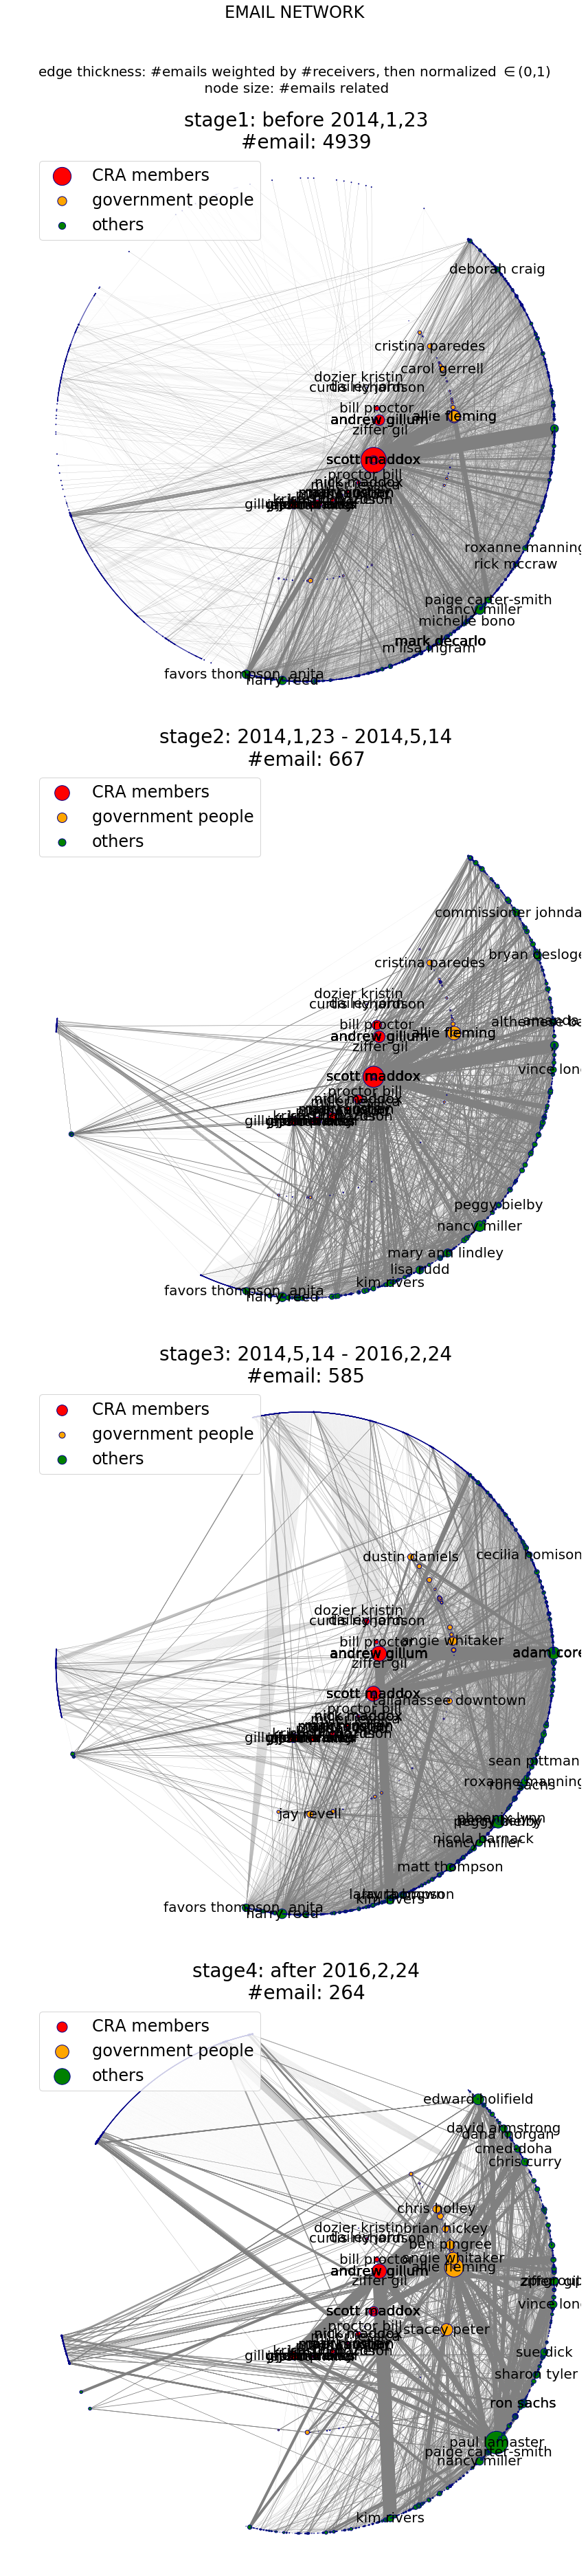

In [427]:
# new
fig = plt.figure(figsize=(12,50))
fig.suptitle('EMAIL NETWORK',fontsize = 24, y=1.04)
fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related', fontsize = 20, ha='center')
for k in tqdm_notebook(range(4)):
    # build adjmat
    df_temp = df_commissioner.iloc[idxes[k]]
    num_email = len(df_temp)
    adj_email_mat1 = np.zeros((len(unique_people),len(unique_people)))
    adj_email_mat2 = np.zeros((len(unique_people),len(unique_people)))

    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()

    for i in range(len(from_list)):
        s = name2id[from_list[i]]
        rs = to_list[i]

        for j in range(len(rs)):
            if rs[j] != ('', '', '') and rs[j] != ['', '', '']:
                r = name2id[rs[j]]
                adj_email_mat1[s,r] += 1
                adj_email_mat2[s,r] += 1/num_TO_CC[i]
        cs = cc_list[i]
        for j in range(len(cs)):
            if cs[j] != ('', '', '') and cs[j] != ['', '', '']:
                r = name2id[cs[j]]
                adj_email_mat1[s,r] += 1
                adj_email_mat2[s,r] += 1/num_TO_CC[i]

    for i in range(len(unique_people)):
        for j in range(i+1,len(unique_people)):
            adj_email_mat1[i,j] = adj_email_mat1[i,j] + adj_email_mat1[j,i]
            adj_email_mat1[j,i] = adj_email_mat1[i,j]
            adj_email_mat2[i,j] = adj_email_mat2[i,j] + adj_email_mat2[j,i]
            adj_email_mat2[j,i] = adj_email_mat2[i,j]
    
    # clean all emails sent to the sender
    for i in range(14):
        adj_email_mat1[i,i] = 0
        adj_email_mat2[i,i] = 0
    adj_email_mat2 = adj_email_mat2/adj_email_mat2.max()
    
    print('matrix done')
    adj_mat = adj_email_mat2
        
    plt.subplot(4,1,k+1)
    nodes = unique_people

    G = nx.Graph()
    G.add_nodes_from(nodes)
    networks = [1,2,3]

    networks_list = []
    for i in range(len(unique_people)):
        if i in commissioner_people_idx_list:
            networks_list.append(1)
        elif i in government_people_idx_list:
            networks_list.append(2)
        else:
            networks_list.append(3)
        
    # map color
    node_network_map = dict(zip(nodes, networks_list))
    colors = ['red', 'orange', 'green']
    color_map = dict(zip(networks, colors))

    mat = adj_email_mat2

    for row, row_val in enumerate(nodes):
        for col, col_val in enumerate(nodes):
            if col > row and mat[row, col] != 0.0:
                G.add_edge(row_val, col_val)

    nodes_by_color = {val: [node for node in G if color_map[node_network_map[node]] == val]
                      for val in colors}

    pos = nx.circular_layout(G)
    radii = [3,6,10]  # for concentric circles

    for ea in pos.keys():
        new_r = 1
        if ea in nodes_by_color['red']:
            new_r = radii[0]
        elif ea in nodes_by_color['orange']:
            new_r = radii[1]
        elif ea in nodes_by_color['green']:
            new_r = radii[2]
        else:
            pass
        pos[ea] *= new_r   # reposition nodes as concentric circles

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(mat[name2id[s],name2id[t]])
    edge_width = np.array(edge_width)
    edge_width = 20*edge_width

    node_size = mat.sum(axis=0)
    node_size = 100*node_size
    
    labeling_idx = node_size.argsort()[-25:][::-1]
    labels = {}
    for i in labeling_idx:
        node = id2name[i]
        labels[node] = node[0] + ' ' + node[1]
    for node,group in node_network_map.items():
        if group == 1:
            labels[node] = node[0] + ' ' + node[1]

    node_sizes = {}
    node_sizes['red'] = node_size[commissioner_people_idx_list]
    node_sizes['orange'] = node_size[government_people_idx_list]
    node_sizes['green'] = node_size[[item for item in np.arange(len(unique_people)) if item not in (commissioner_people_idx_list+government_people_idx_list)]]

    legend_labels = {'red': 'CRA members','orange': 'government people','green': 'others' }
    for color, node_names in nodes_by_color.items():
        local_node_size = node_sizes[color]
        nx.draw_networkx_nodes(G, pos=pos, node_size=local_node_size, edgecolors='darkblue', nodelist=node_names, node_color=color, label=legend_labels[color])

    nx.draw_networkx_edges(G, pos=pos, width=edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=20, font_color='black')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 28)
    plt.legend(fontsize = 24, loc=2)
    plt.axis('off')

plt.tight_layout()
# plt.savefig('Email_network3.png')
plt.show()
